In [1]:
#Regréssion linéaire

import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
#Etape 1: Générer un dataset aléatoire grâce à sklearn : make_regression
x , y = make_regression(n_samples=100, n_features=1, noise = 10)

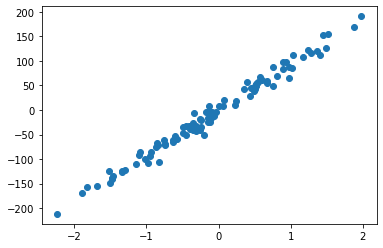

In [3]:
plt.scatter(x,y)

In [4]:
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [6]:
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)


In [13]:
#matrice X 
X = np.hstack((x , np.ones(x.shape)))
X.shape

(100, 2)

In [14]:
#Initialiser theta avec des paramètres aléatoires
theta = np.random.randn(2,1)
theta.shape

(2, 1)

In [15]:
theta

array([[ 1.0699659 ],
       [-1.37319478]])

In [16]:
#Etape 2: modèle
#créer fonction X produit theta
def model(X, theta):
    return X.dot(theta)

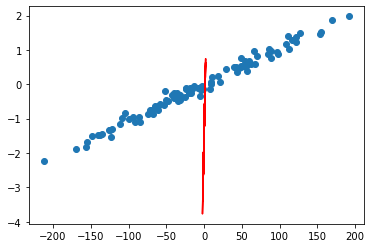

In [23]:
plt.plot(x,model(X, theta), c='r')
plt.scatter(y,x)

In [24]:
#Fonction cout (erreur quadratique moyenne) >> on veut que ça tende vers 0
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X,theta)-y)**2)

In [25]:
cost_function(X,y,theta)

3507.389798089128

In [35]:
#Gradient et Descente de gradient
#Gradient
def grad(X,y,theta):
    m=len(y)
    return (1/m)*X.T.dot( model(X,theta) - y)

In [36]:
grad(X,y,theta)

array([[-75.33450648],
       [  6.56444601]])

In [49]:
#Algo de descente de gradient
def gradient_descent(X,y,theta, learning_rate, n_iterations):
    
    #---------------on a rajouté ces 2 lignes pour savoir si la machine a réussi à bien apprendre----------
    cost_history = np.zeros(n_iterations)
    for i in range (0, n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        #------------ on va insérer dans ce vecteur (après chaque itération) -----------
        cost_history[i]= cost_function(X,y,theta)
        
    return theta , cost_history

In [50]:
#Machine Learning
theta_final ,cost_history = gradient_descent(X,y,theta, learning_rate=0.05, n_iterations=400)
theta_final

array([[92.81259308],
       [ 0.17902874]])

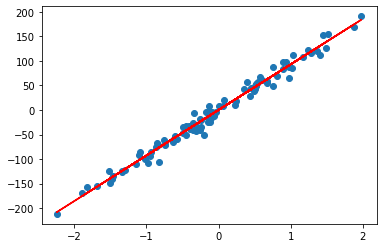

In [51]:
#vérification de l'apprentissage du madèle
predictions = model(X,theta_final)
plt.plot(x,predictions,c='r')
plt.scatter(x,y)

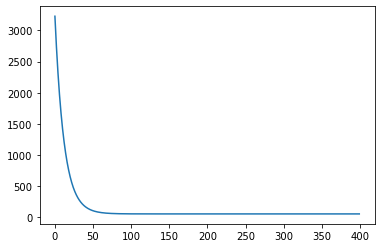

In [53]:
#cost_history ou visualiser la courbe d'apprentissage de notre algo (ici à partir de la 80ème itération on aurai pu aréter les itérations) 
plt.plot(range(400), cost_history)

In [54]:
#Coefficient de détermination (permet de montrer la performance de notre modèle- plus proche de 1 plus le modèle performant)
def coef_determination(y , pred):
    u = ((y-pred)**2).sum()
    v = ((y- y.mean())**2).sum()
    return 1- u/v

In [55]:
#Modèle précis à hauteur de 98,4% (il sert à le montrer au patron/collègues)
coef_determination(y, predictions)

0.984075497491432